## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import geopandas as gpd
import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
         }

plot.rcParams.update(params)

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)



## Gathering Data

In [3]:
# Gathering datasets
# Datasets come from Kaggle and contain resepctively Airbnb listings information, reviews and listing availability
# Listings will be the main dataset used
listings = pd.DataFrame()
reviews = pd.DataFrame()
calendar = pd.DataFrame()
for num in [1,2]:
    lis = pd.read_csv('/Users/alessandrojovi/Downloads/airbnb_city_{x}/listings.csv'.format(x=num))
    listings = listings.append(lis)
    cal = pd.read_csv('/Users/alessandrojovi/Downloads/airbnb_city_{x}/calendar.csv'.format(x=num))
    calendar = calendar.append(cal)
    rev = pd.read_csv('/Users/alessandrojovi/Downloads/airbnb_city_{x}/reviews.csv'.format(x=num))
    reviews = reviews.append(rev)

## Assessing Data

In [42]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,7.386000e+03,7.386000e+03,7.386000e+03,7384.000000,7384.000000,7386.000000,7386.000000,7386.000000,7356.000000,7370.000000,7376.000000,153.000000,7386.000000,7386.000000,7386.000000,7.386000e+03,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,5935.000000,5914.000000,5924.000000,5917.000000,5926.000000,5918.000000,5918.000000,0.0,7386.000000,6012.000000
mean,6.936416e+06,2.016049e+13,2.017516e+07,32.289816,32.289816,45.073998,-97.576265,3.199973,1.241028,1.282090,1.674349,856.026144,150.165990,1.554698,2.758597,1.434460e+04,12.851476,29.571487,48.646764,213.166396,20.726780,93.312047,9.540920,9.416948,9.720973,9.733378,9.517742,9.319365,NaN,7.699431,2.028059
std,4.045208e+06,4.008986e+08,1.960979e+07,123.719251,123.719251,2.643372,25.611231,1.890848,0.549601,0.823766,1.081981,647.189653,124.092238,1.200564,13.257854,1.163569e+06,12.069838,23.837406,35.006666,138.291406,36.763978,8.208626,0.821926,0.999252,0.682576,0.656899,0.775625,0.892990,NaN,21.488656,1.968624
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,0.000000,42.235942,-122.417219,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,3.853769e+06,2.016010e+13,4.335720e+06,1.000000,1.000000,42.345691,-122.330904,2.000000,1.000000,1.000000,1.000000,420.000000,79.000000,1.000000,1.000000,9.675000e+01,0.000000,1.000000,7.000000,77.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.590000
50%,7.021804e+06,2.016010e+13,1.442861e+07,1.000000,1.000000,47.543885,-122.276883,2.000000,1.000000,1.000000,1.000000,770.000000,120.000000,1.000000,2.000000,1.125000e+03,10.000000,31.000000,56.000000,259.000000,7.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.370000
75%,9.491550e+06,2.016091e+13,3.028359e+07,4.000000,4.000000,47.624593,-71.079551,4.000000,1.000000,2.000000,2.000000,1200.000000,189.750000,2.000000,3.000000,1.125000e+03,26.000000,55.000000,84.000000,347.000000,24.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.890000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,47.733358,-71.000100,16.000000,8.000000,7.000000,16.000000,3000.000000,4000.000000,15.000000,1000.000000,1.000000e+08,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,136.000000,19.150000


In [43]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7386 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7386 non-null   int64  
 1   listing_url                       7386 non-null   object 
 2   scrape_id                         7386 non-null   int64  
 3   last_scraped                      7386 non-null   object 
 4   name                              7386 non-null   object 
 5   summary                           7066 non-null   object 
 6   space                             5768 non-null   object 
 7   description                       7386 non-null   object 
 8   experiences_offered               7386 non-null   object 
 9   neighborhood_overview             4947 non-null   object 
 10  notes                             3816 non-null   object 
 11  transit                           5171 non-null   object 
 12  thumbn

In [6]:
listings.market.value_counts()

Seattle                  3818
Boston                   3568
San Francisco               1
Other (International)       1
Other (Domestic)            1
Name: market, dtype: int64

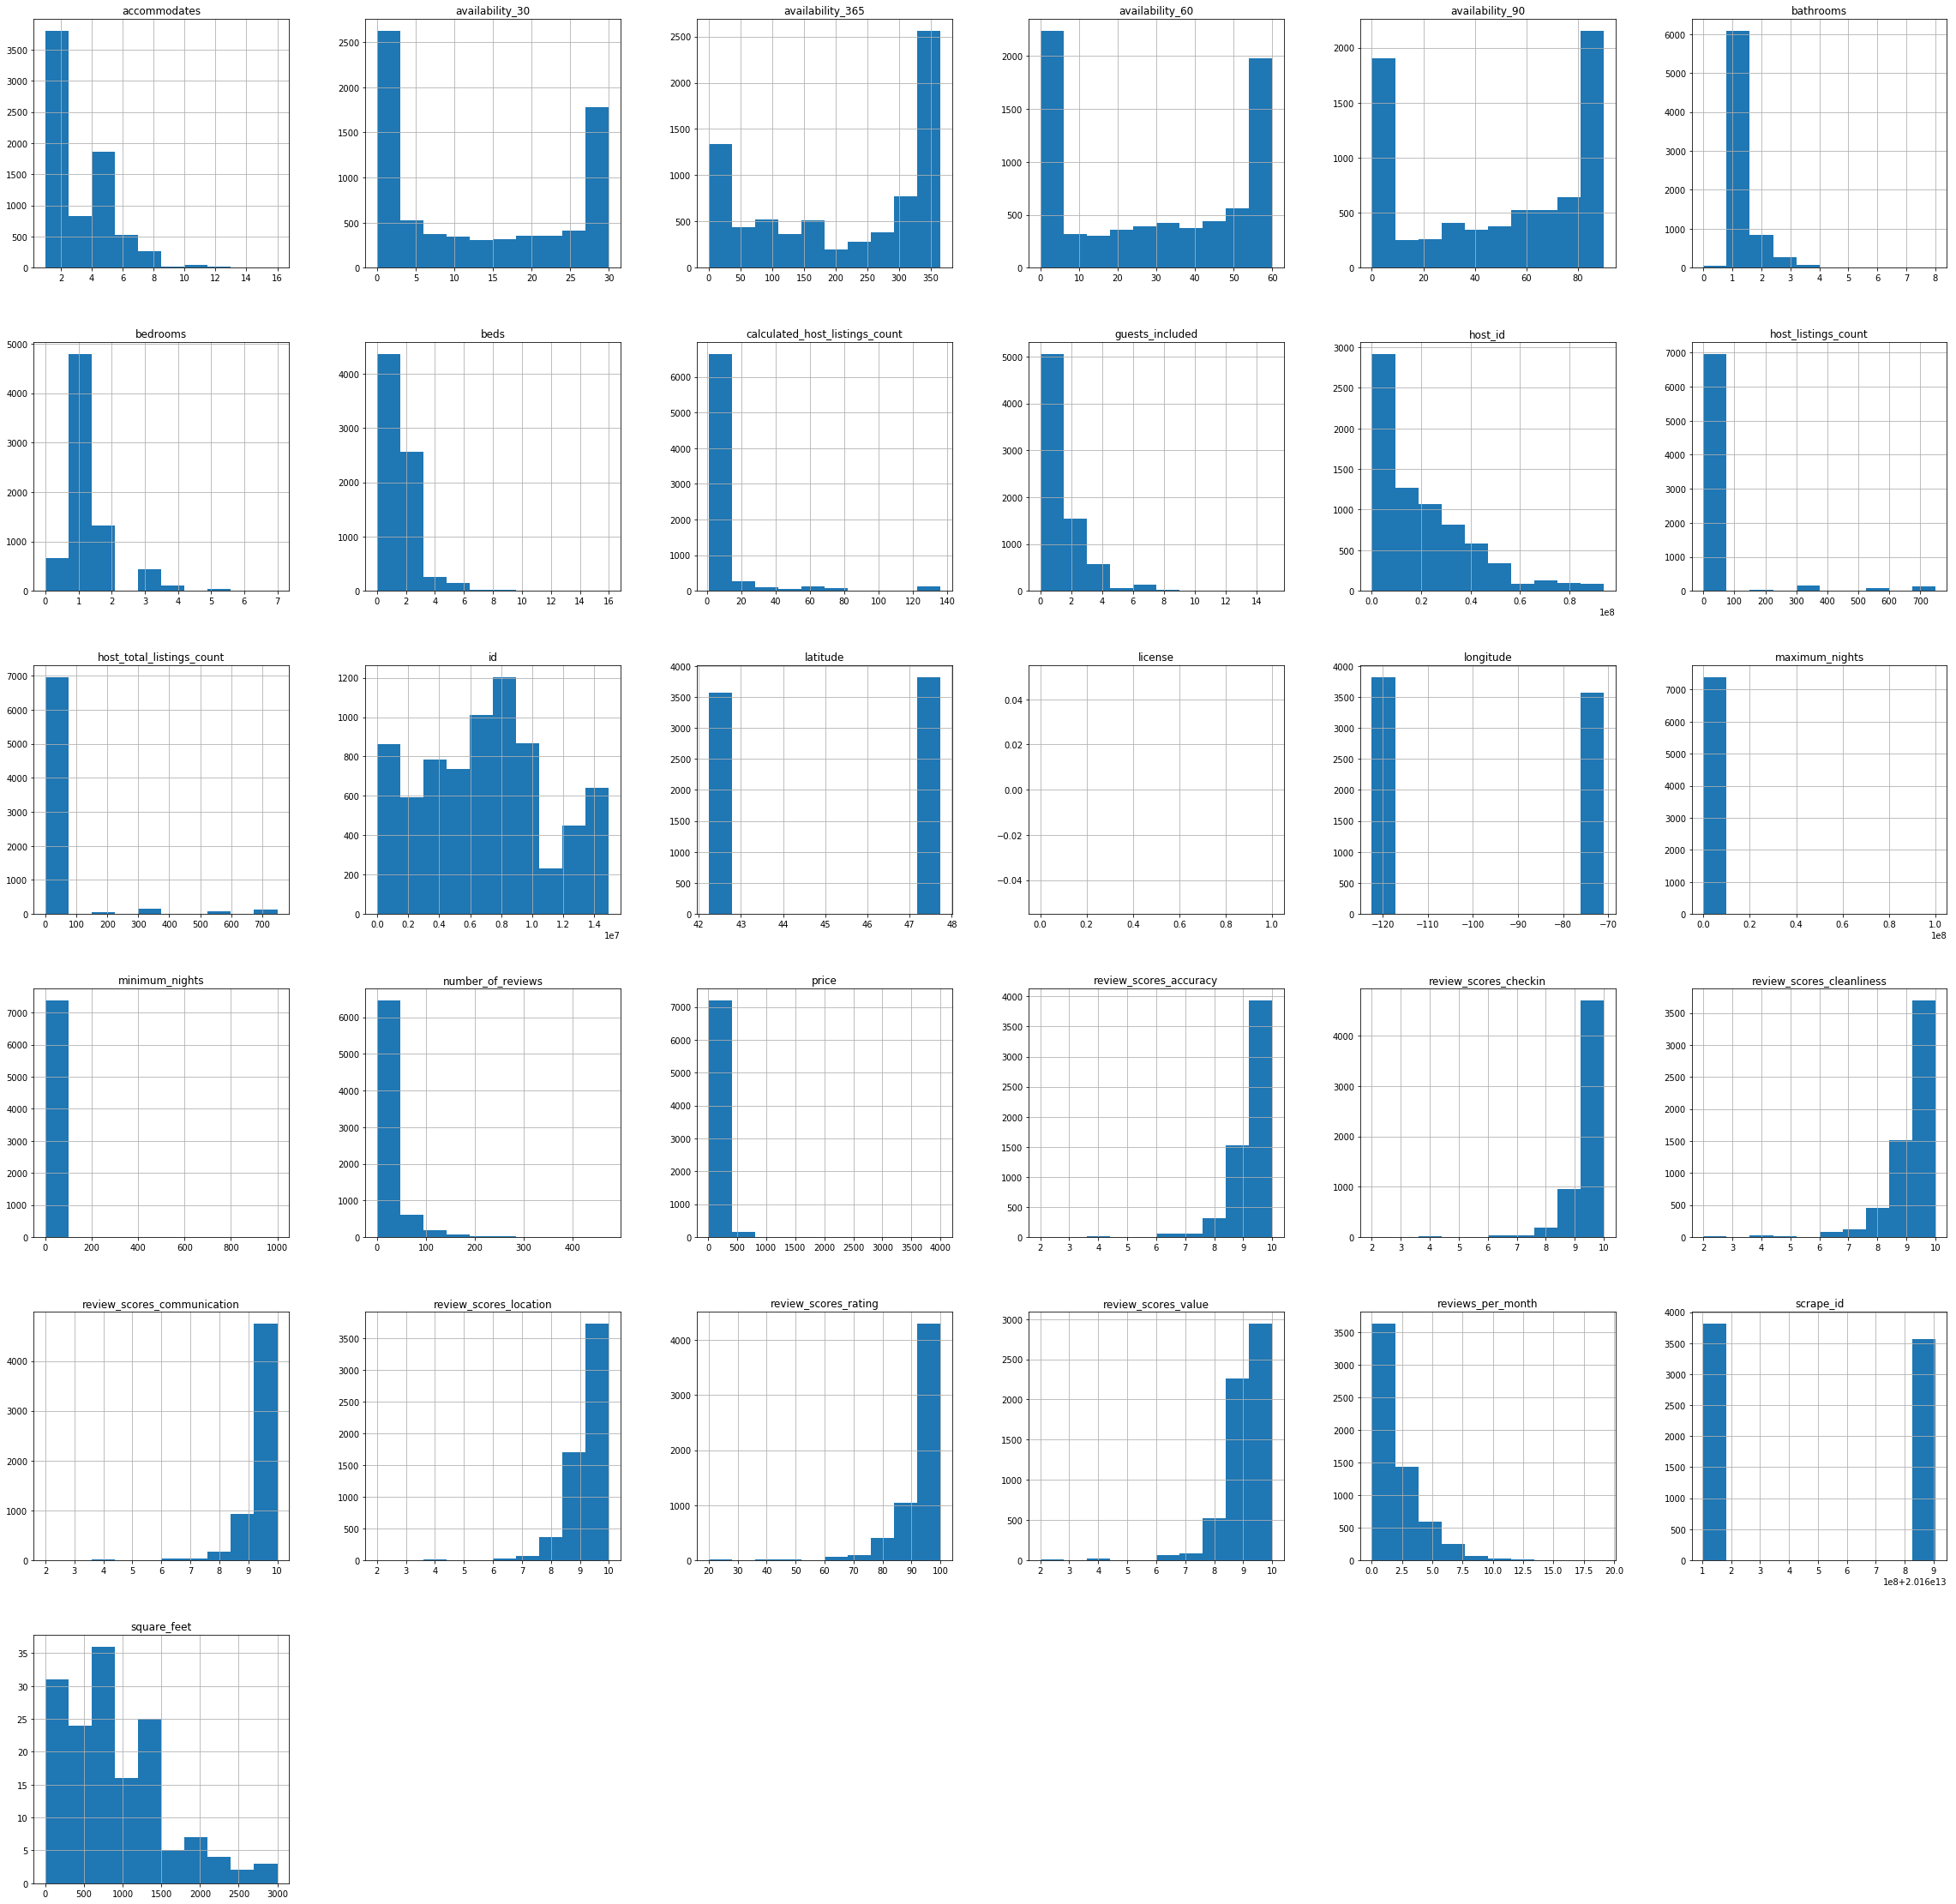

In [79]:
listings.hist(figsize=(40,40));

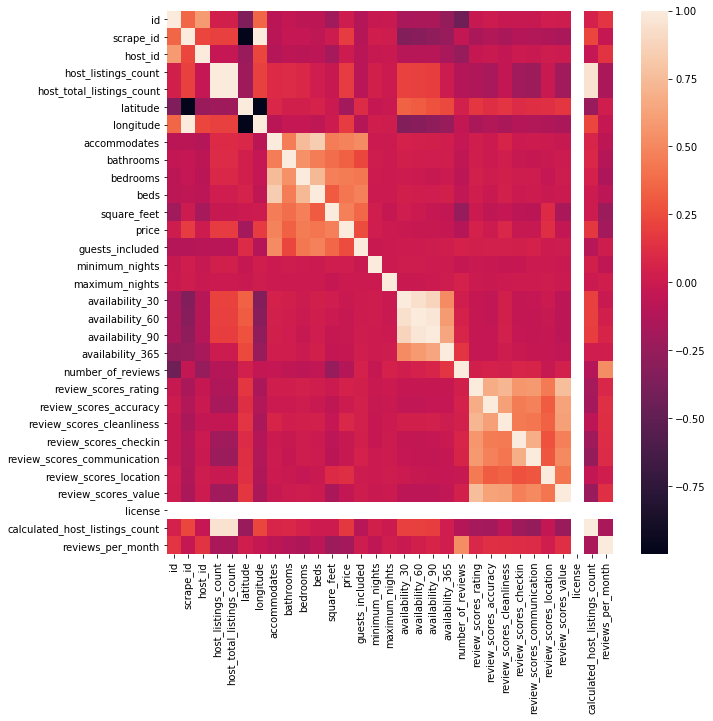

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.corr());

## Clean Data and Organise Datasets

In [8]:
# Remove irrelevant markets
listings = listings[listings['market'].isin(['Boston','Seattle'])]

In [9]:
# clean prices and change format
listings['price'] = pd.to_numeric(listings['price'].str.replace('$','').str.replace(',',''))

In [10]:
# Merging listings and calendar dataframes to evaluate occupancy
listings_to_merge_cal = listings[['id','market','host_is_superhost','neighbourhood','property_type','room_type','price']]
listings_to_merge_cal = listings_to_merge_cal.rename(columns={'price':'listing_price'})

calist = calendar.merge(listings_to_merge_cal.rename(columns={'id':'listing_id'}),how='left',on=['listing_id'])

In [11]:
# convert date to datetime format
calist['date'] = pd.to_datetime(calist['date'])
calist['YearMonth'] = calist.date.dt.strftime('%Y-%m')

In [13]:
# Available field was a string, so converting it to boolean 
calist['occupancy'] = np.where(calist['available'] == 'f',1,0)

In [15]:
# Computing average occupancy rate on a market level
occupancy = calist.groupby(['market','YearMonth']).agg({'occupancy':'mean'}).reset_index()

In [ ]:
def plot_barplot(df, y_plot, x_plot, plot_title=None, x_axis_title=None, y_axis_title=None, figure_width=40, figure_heigth=15, color_mark=None):
    """
Description: This function returns a barplot using the Seaborn library

Arguments:
    figure_width: Width of the figure 
    figure_heigth: Heigth of the figure
    df: Dataframe to plot
    x_plot: X axis to plot
    y_plot: Y axis to plot
    color_mark: Give different colouring based on a dataframe column 
    plot_title: The title of the plot
    x_axis_title: X axis Legend
    y_axis_title: Y axis Legend

Returns:
    None
"""
    plt.figure(figsize=(figure_width,figure_heigth))
    plt.xticks(rotation=90)
    df = df.sort_values(by=y_plot,ascending=False)
    df = df[df[y_plot].notnull()]
    plt.title(plot_title,fontdict={'fontsize':35},)
    ax = plt.gca()
    ax.tick_params(axis = 'both', labelsize = 18)
    plt.xlabel(x_axis_title, fontsize=18)
    plt.ylabel(y_axis_title, fontsize=18)

    sns.barplot(data=df,x=x_plot,y=y_plot,hue=color_mark,ci=False);

### Missing Values

For analysing occupancy and prices, I aggregate on a neighbouthood level, I did not consider to fill missing values with either mode or average, because I didnt want to modify the data.
On the other hand, I could have filled review scores, as follows:
- Location review, could have been the average score for the neighbourhood
- Cleanliness review, Communication review and Check In reviews, I could have filled the average using the host average


However, I did not know how the final scores were computed, so I preferred to just not consider the null values.

In [ ]:
'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','review_scores_rating'

# Visualise Data

We are going to explore the following questions:
- Where would it be ideal to be an AirBnb owner? What are the best neighbourhoods?
- Are there any advantages in being a superhost in terms of remuneration?
- What are the main determinants of prices and occupancy?

## Part 1: Where Are The Most Remunerative Listings in the Dataset?

Taking a look at average prices per night and average occupancy rate, we will find where the most remunerative listings are located

In [16]:
boston = listings[listings['market'] == 'Boston']
boston_avg_price = boston.groupby('neighbourhood').mean()['price'].reset_index()

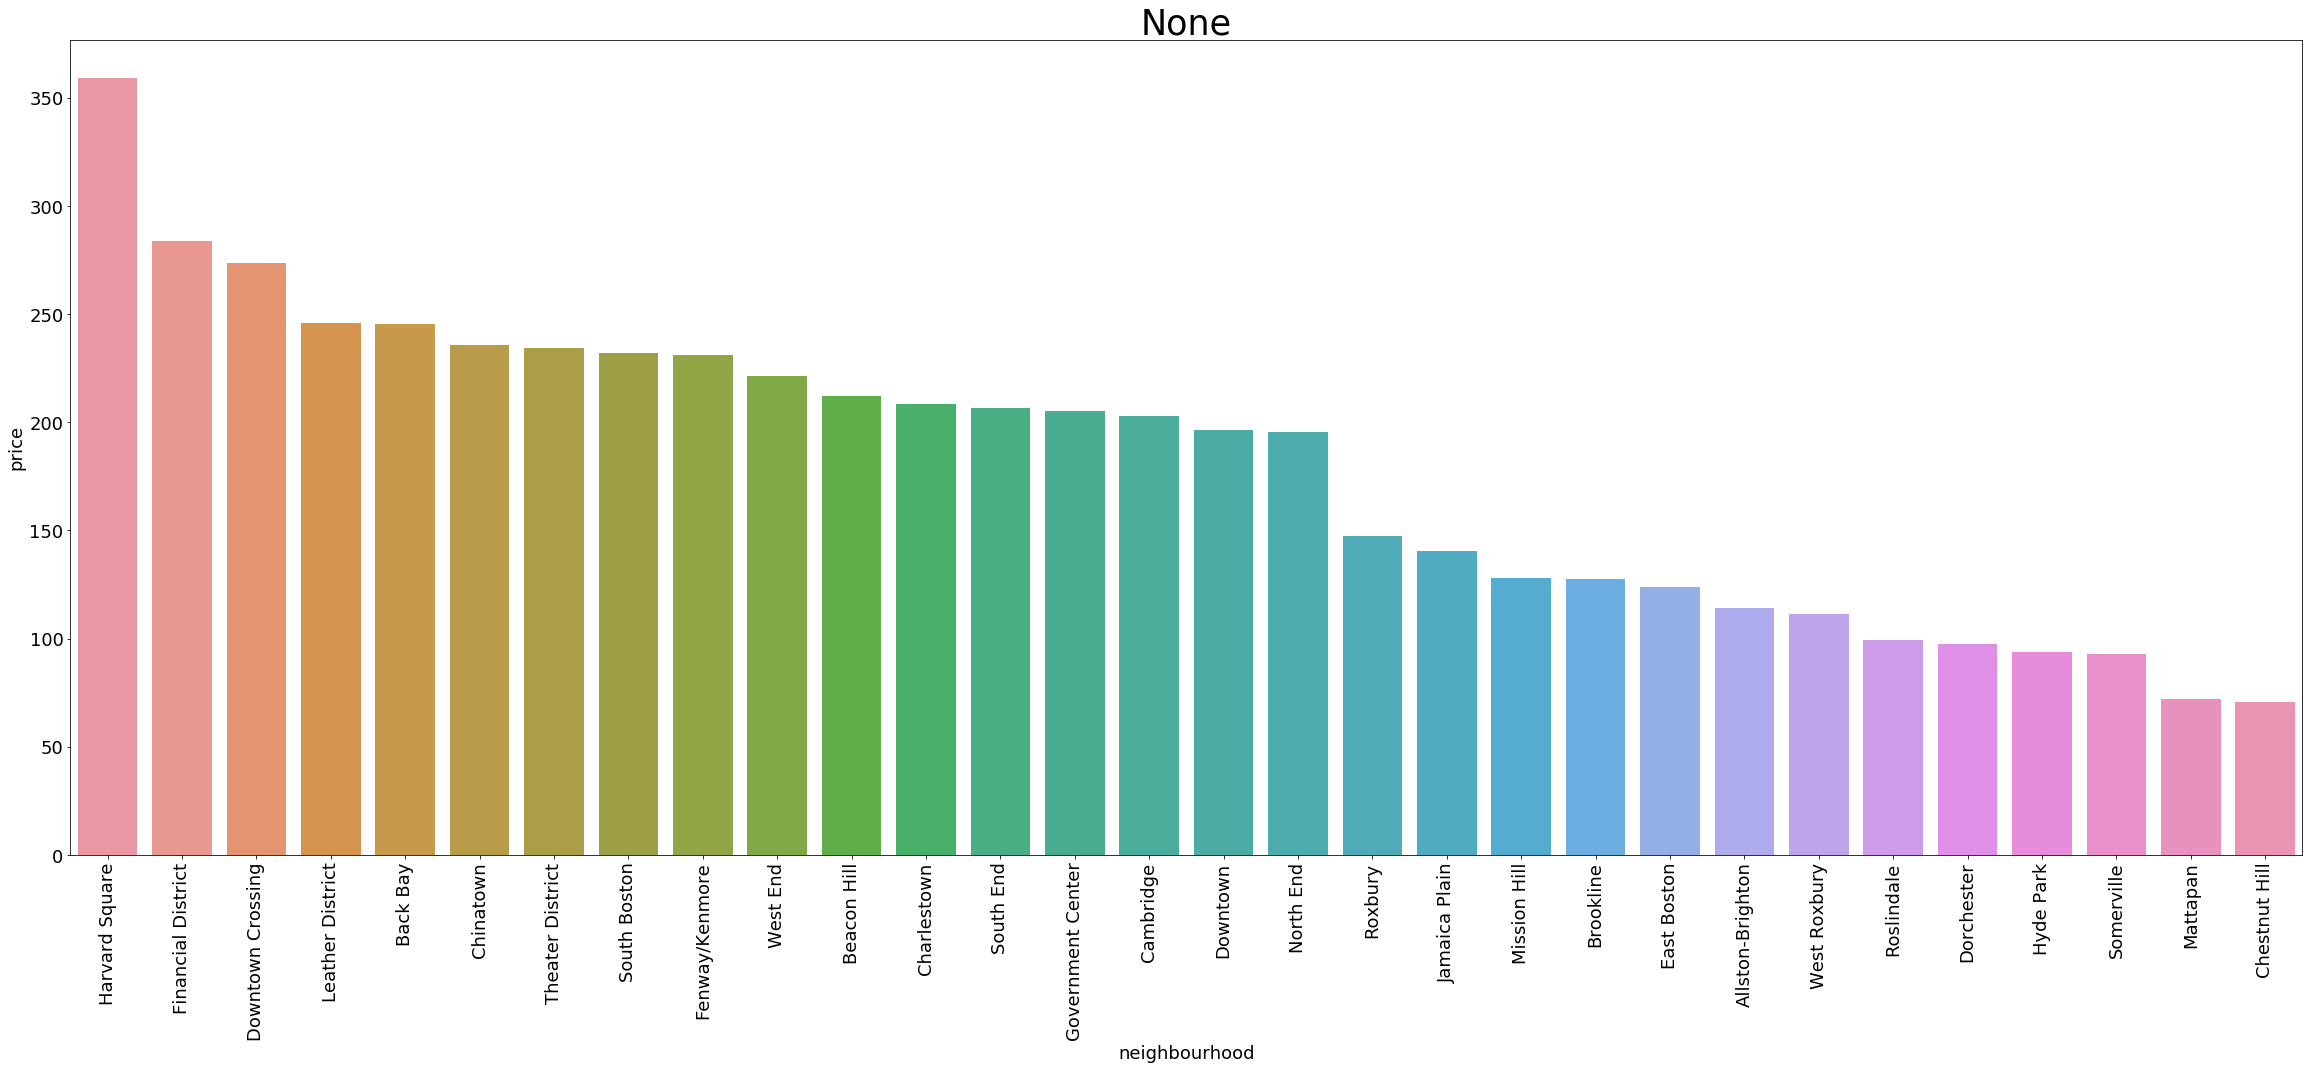

In [74]:
# Boston Average prices per neighbourhood
plot_barplot(df=boston_avg_price,x_plot='neighbourhood',y_plot='price')

In [18]:
seattle = listings[listings['market'] == 'Seattle']
seattle_avg_price = seattle.groupby('neighbourhood').mean()['price'].reset_index()

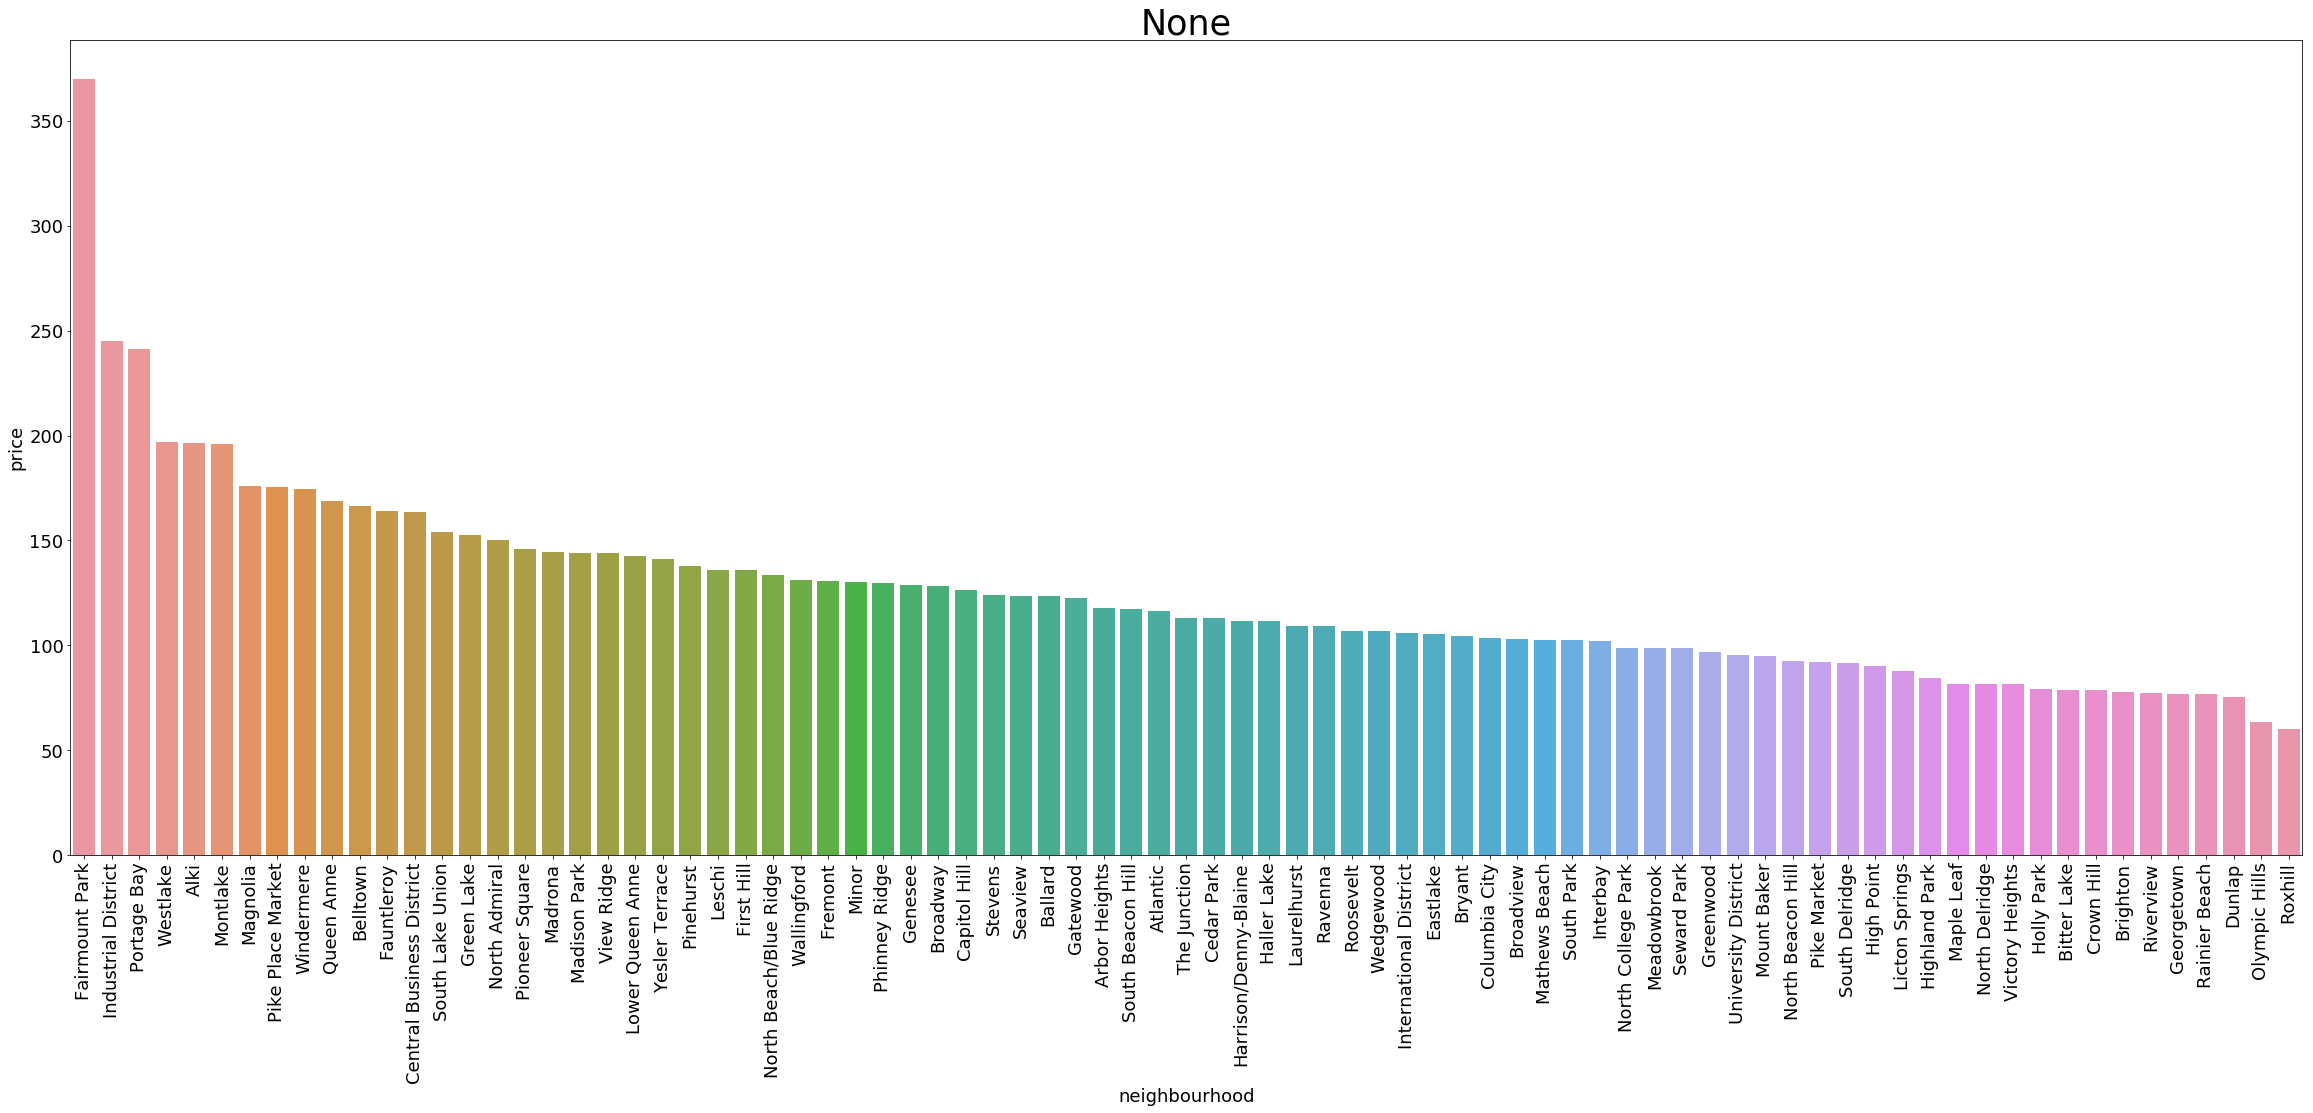

In [73]:
# Seattle Average prices per neighbourhood
plot_barplot(df=seattle_avg_price,x_plot='neighbourhood',y_plot='price')

In [20]:
market_wide_avg_price = listings.groupby(['market']).mean()['price'].reset_index()

market_wide_avg_price

,market,price
0,Boston,173.910594
1,Seattle,127.976166


In [21]:
avg_price = listings.groupby(['market','neighbourhood']).mean()['price'].reset_index()

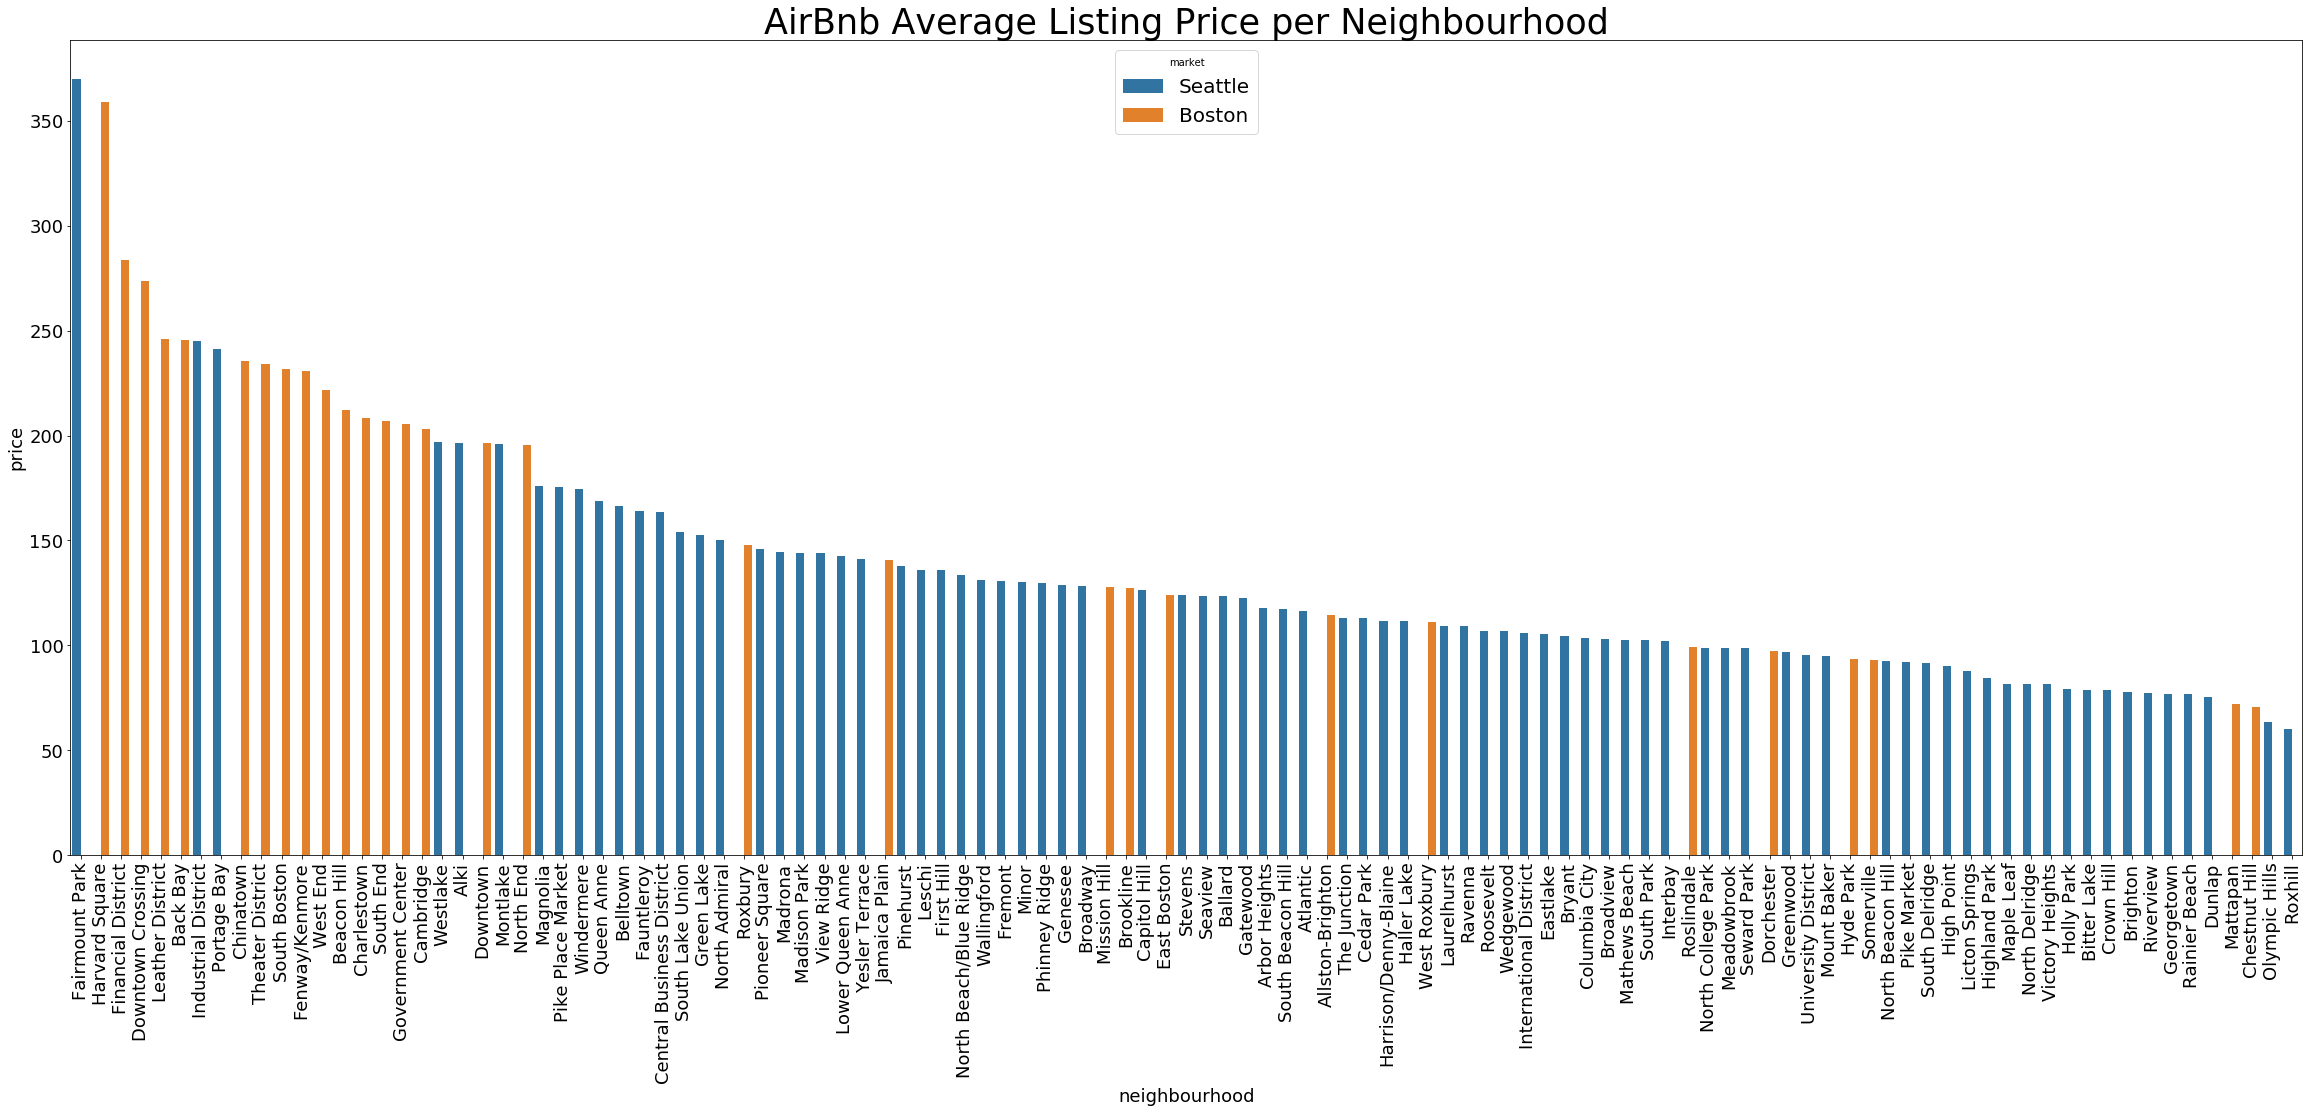

In [66]:
# Average Prices coloured by Market
plot_barplot(df=avg_price,y_plot='price',x_plot='neighbourhood',x_axis_title='Neighbourhood',y_axis_title='Price',plot_title='AirBnb Average Listing Price per Neighbourhood',color_mark='market')

Even though Seattle has the most remunerative neighbourhood in the dataset, Boston seems to be more dense in the left part of the visualisation, where neighbourhoods carry higher prices per night.
Now, we will look at occupancy, as nobody wants to list a place that carries an high price per night, but that is in a very unpopular area.

In [24]:
# Assumption in calendat dataset
# When available is false, listing is rented
market_occ_rate = calist.groupby(['market']).mean()['occupancy'].reset_index()

market_occ_rate

,market,occupancy
0,Boston,0.508719
1,Seattle,0.329390


In [25]:
boston = calist[calist['market'] == 'Boston']
boston_occ = boston.groupby('neighbourhood').mean()['occupancy'].reset_index()

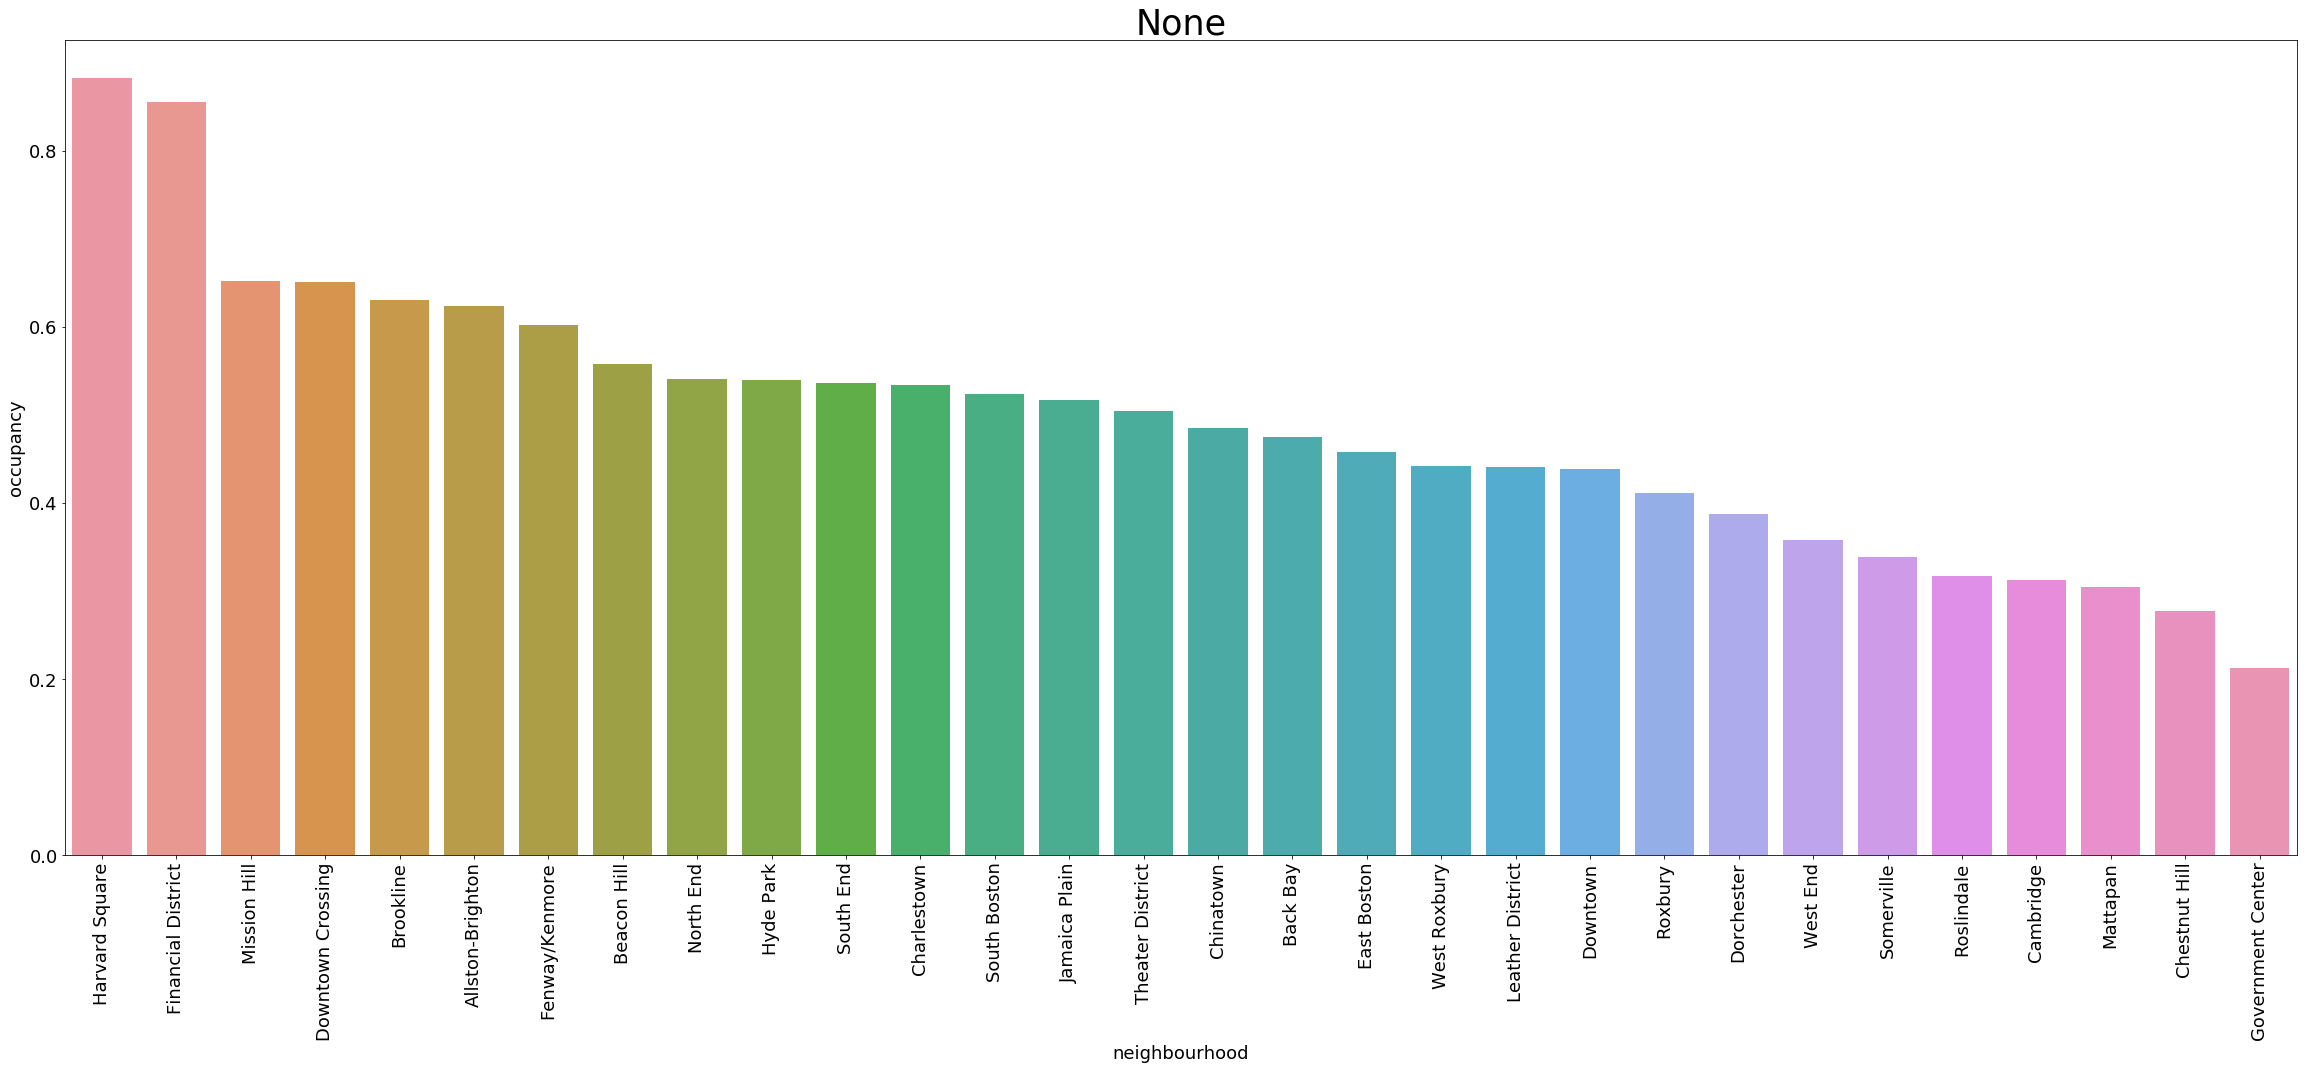

In [71]:
# Seattle Average Occupancy per neighbourhood
plot_barplot(df=boston_occ,x_plot='neighbourhood',y_plot='occupancy')

In [27]:
seattle = calist[calist['market'] == 'Seattle']
seattle_occ = seattle.groupby('neighbourhood').mean()['occupancy'].reset_index()

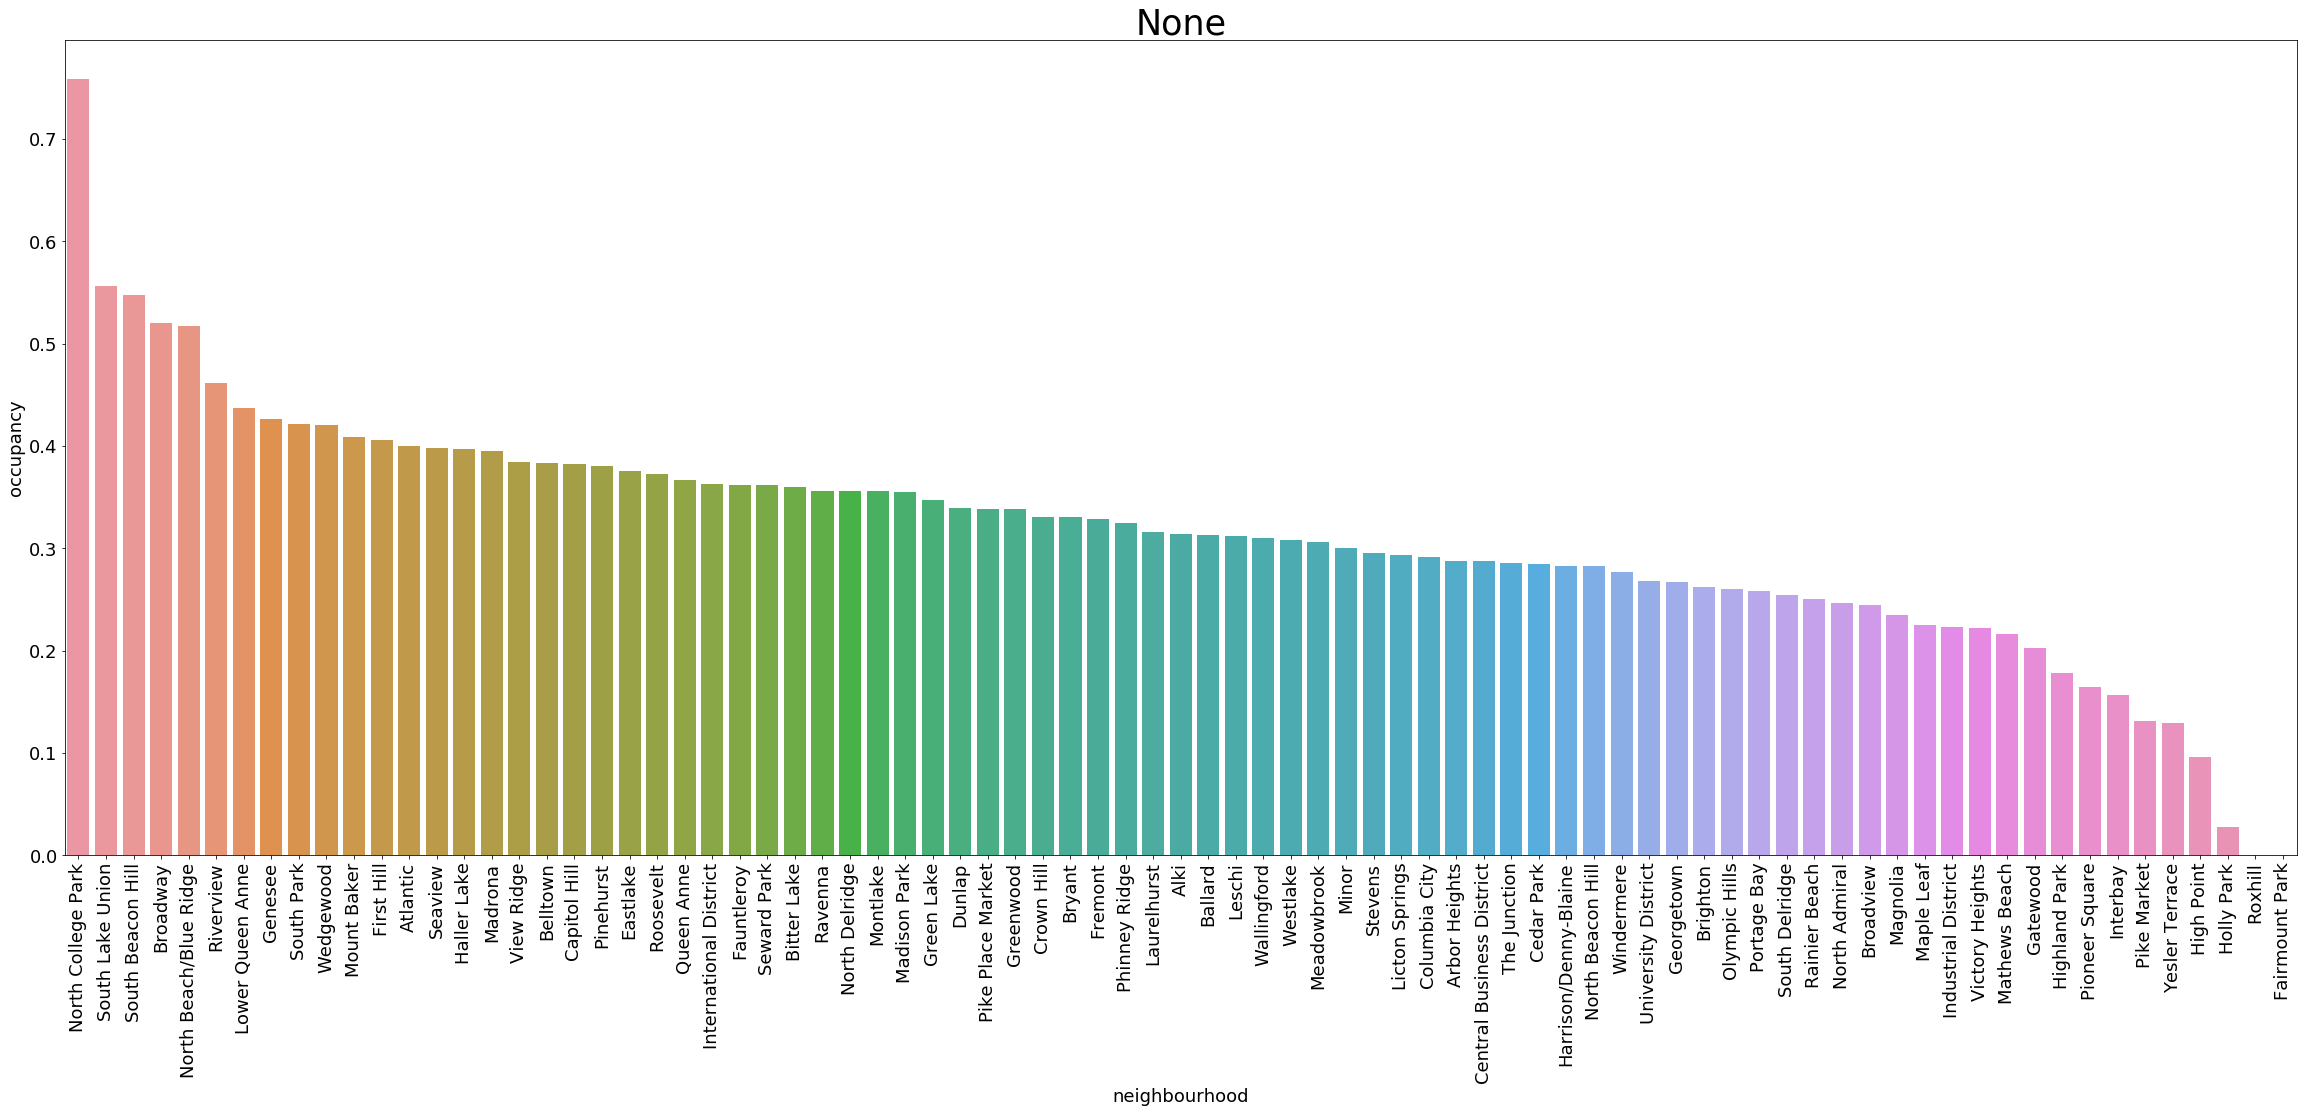

In [72]:
# Boston Average Occupancy per neighbourhood
plot_barplot(df=seattle_occ,x_plot='neighbourhood',y_plot='occupancy')

In [29]:
occupancy_rate = calist.groupby(['market','neighbourhood']).mean()['occupancy'].reset_index()

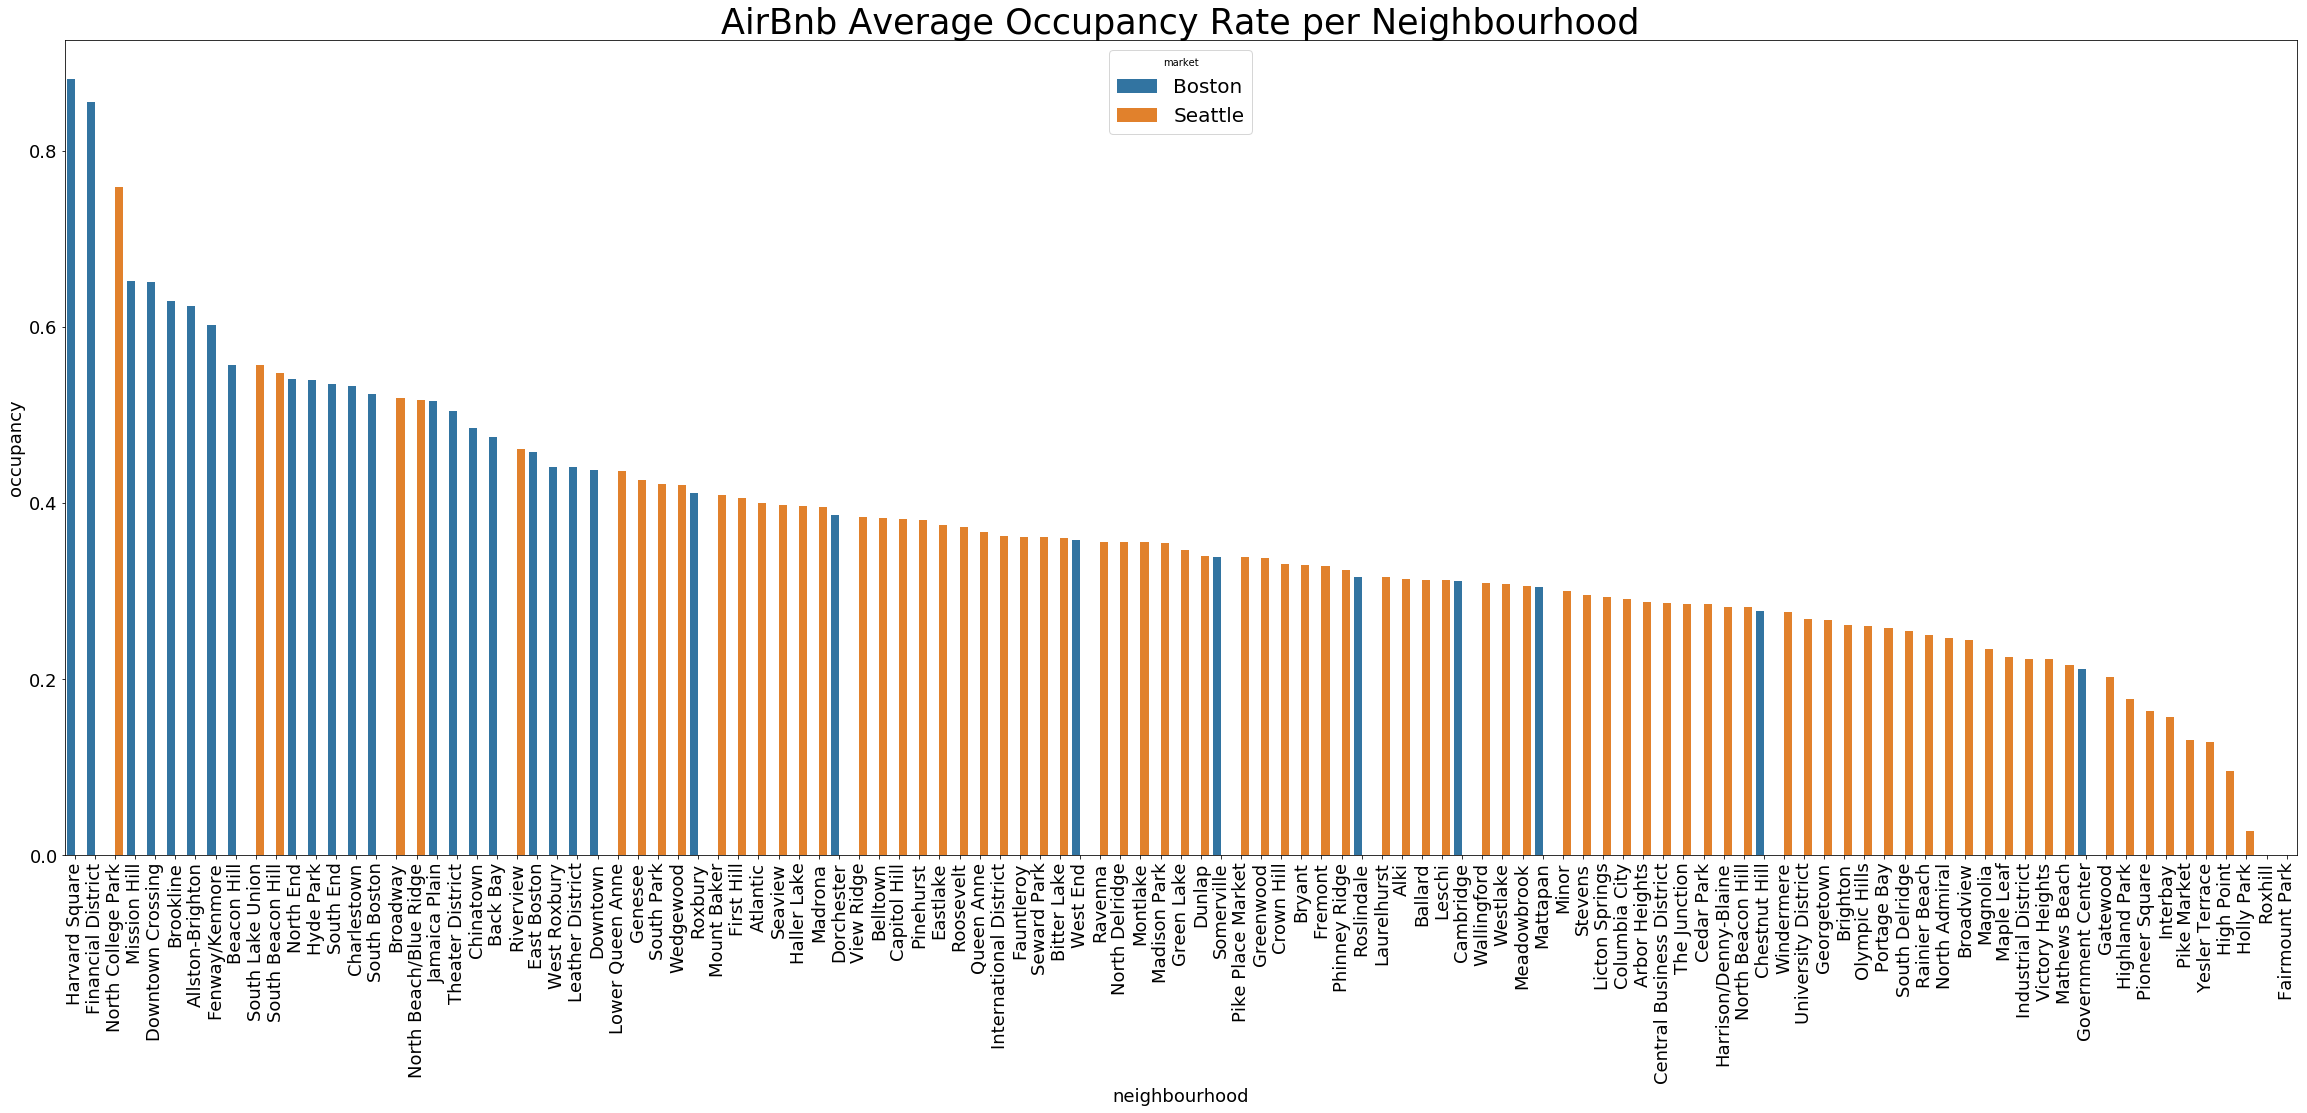

In [61]:
#  Average Occupancy coloured by market
plot_barplot(df=occupancy_rate,y_plot='occupancy',x_plot='neighbourhood',x_axis_title='Neighbourhood',y_axis_title='Occupancy',plot_title='AirBnb Average Occupancy Rate per Neighbourhood',color_mark='market')

Again, Boston seems to be busier than Seattle. 
Now, we will combine prices and occupancy to find out the best neighbourhood in the dataset.

In [31]:
price_occupancy = avg_price.merge(occupancy_rate,on=['market','neighbourhood'])

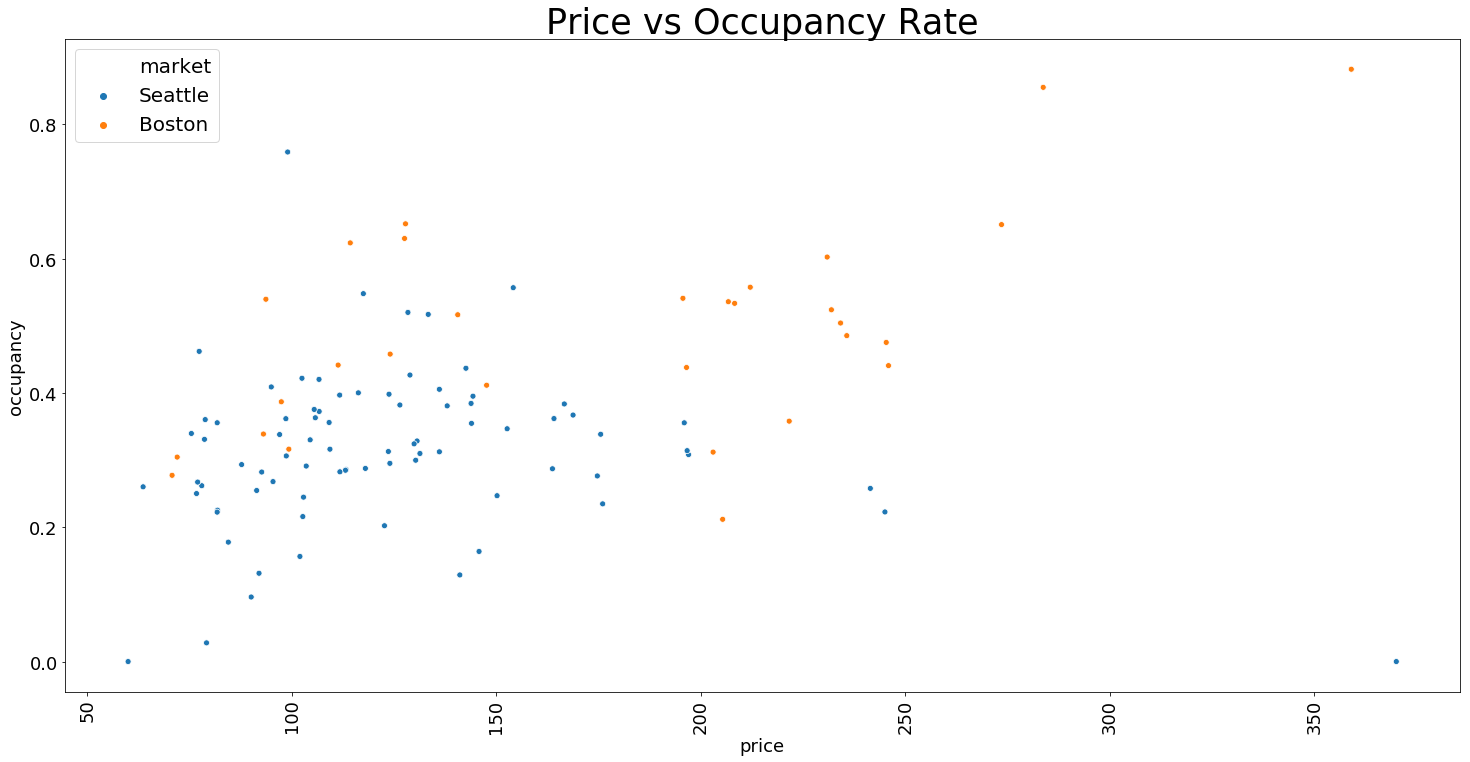

In [32]:
# Scatter plot of Occupancy vs Prices

plt.figure(figsize=(25,12))
plt.xticks(rotation=90)
plt.title('Price vs Occupancy Rate',fontdict={'fontsize':35},)
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 18)
plt.xlabel('Price', fontsize=18)
plt.ylabel('Occupancy Rate', fontsize=18)

sns.scatterplot(data=price_occupancy,x='price',y='occupancy',hue='market');

The orange point in the top right is Harvard Square, which is the busiest neighbourhood in the dataset, and the 2nd most exapensive one.
On the other side, Fairmont Square, seem to carry high prices, but to be an apparently unpopular destination.

## How Important Are Reviews?

In [35]:
# Creating new df with occupancy and reviews
listings_to_merge_occupancy = listings[['name','id','market','host_is_superhost','neighbourhood','property_type','room_type','price','host_response_rate','host_acceptance_rate','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
listings_to_merge_occupancy = listings_to_merge_occupancy.rename(columns={'price':'listing_price'})
listing_occupancy = calist.groupby('listing_id').mean()['occupancy'].reset_index()

listing_occupancy = listing_occupancy.merge(listings_to_merge_occupancy.rename(columns={'id':'listing_id'}),how='left',on=['listing_id'])

In [36]:
listing_occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 7402
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   7403 non-null   int64  
 1   occupancy                    7403 non-null   float64
 2   name                         7386 non-null   object 
 3   market                       7386 non-null   object 
 4   host_is_superhost            7384 non-null   object 
 5   neighbourhood                6427 non-null   object 
 6   property_type                7382 non-null   object 
 7   room_type                    7386 non-null   object 
 8   listing_price                7386 non-null   float64
 9   host_response_rate           6393 non-null   object 
 10  host_acceptance_rate         6143 non-null   object 
 11  review_scores_rating         5935 non-null   float64
 12  review_scores_accuracy       5914 non-null   float64
 13  review_scores_clea

In [39]:
listing_occupancy_relevant = listing_occupancy[['occupancy','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','review_scores_rating','listing_price']]

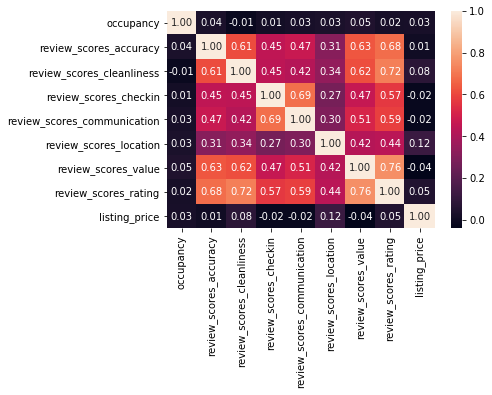

In [40]:
sns.heatmap(listing_occupancy_relevant.corr(), annot=True, fmt=".2f");

## Is Being a Superhost Worthy?

Here, we are checking if superhost listings are associated to higher prices per night

In [47]:
listing_occupancy.groupby('host_is_superhost')['listing_price'].describe()

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,,,,,,,,
f,6199.0,150.946766,126.480796,10.0,79.0,120.0,195.0,4000.0
t,1185.0,146.040506,110.787979,30.0,80.0,110.0,170.0,1300.0


In [52]:
# listing_occupancy.groupby(['market','host_is_superhost'])['listing_price'].describe()[['mean','std']].to_clipboard()